In [12]:
# Import necessary libraries
import pandas as pd
from scipy.stats import kendalltau
import matplotlib.pyplot as plt


In [2]:
# Load data from excel file
df = pd.read_excel('Thesis_V6.xlsx')
df.dropna(inplace=True)

In [9]:
# Visualizing the first 6 rows with column head
df.head(6) 

,FID,Lat,Long,GR (Recharge),Precipitation,ET_pot,Prec_seasonality,Temp_seasonality,Aridity,DEM,...,Landuse,Rock type,Recharge fraction,a,alpha,b,beta,scale,Location,Duration(24hrs)
0,0,37.3,-80.1,27.0,998,1213,11,7894,1.135838,373,...,14,13,0.027054,10.216609,-0.569130,10.270910,-0.725667,0.948149,0.979379,0.120018
1,1,46.3,-119.9,119.0,191,1118,43,7596,5.994595,278,...,12,14,0.623037,10.216609,-0.569130,10.270910,-0.725667,0.948149,0.979379,0.120018
7,7,37.4,116.3,84.6,534,1089,114,10329,1.981785,55,...,12,14,0.158427,13.270794,-0.621530,5.259001,-0.599323,0.978923,0.975101,0.085029
8,8,-12.0,135.6,252.7,1395,1608,110,1582,1.095173,1,...,8,14,0.181147,15.554260,-0.619861,5.818436,-0.599514,0.949102,0.987621,0.129363
9,9,-12.0,135.6,444.7,1395,1608,110,1582,1.095173,1,...,8,14,0.318781,15.554260,-0.619861,5.818436,-0.599514,0.949102,0.987621,0.129363
10,10,-12.1,135.6,257.0,1369,1618,110,1645,1.155381,1,...,12,14,0.187728,12.528232,-0.421433,7.977501,-0.553530,0.956483,0.990743,0.074722


In [3]:
# Extract different climatic variables
Precipitation = df['Precipitation']
Precipitation_seasonality = df['Prec_seasonality']
Temp_seasonality = df['Temp_seasonality']
Aridity = df['Aridity']
Potential_ET = df['ET_pot']
recharge_fraction = df['Recharge fraction']

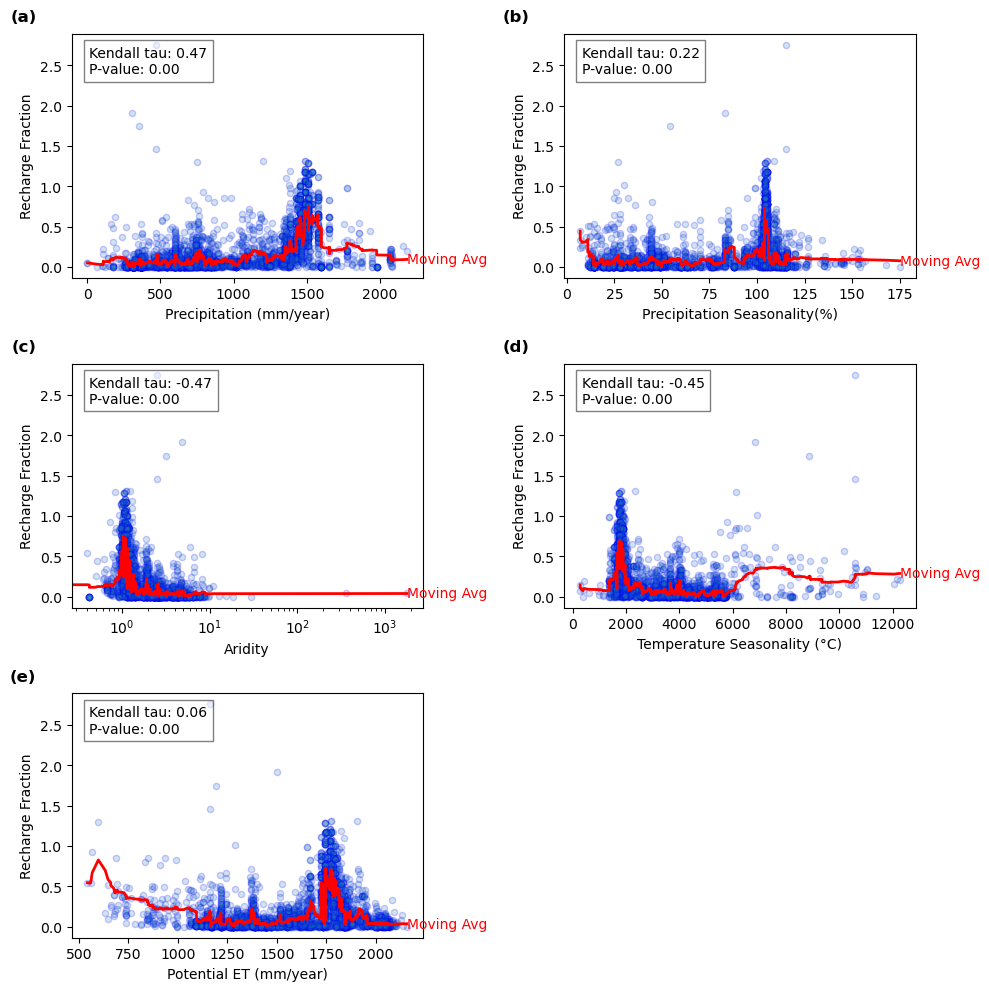

In [11]:
# Create subplot 
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

# Define data and labels
plot_data = [
    (Precipitation, 'Precipitation (mm/year)', '(a)'),
    (Precipitation_seasonality, 'Precipitation Seasonality(%)', '(b)'),
    (Aridity, 'Aridity', '(c)'),
    (Temp_seasonality, 'Temperature Seasonality (°C)', '(d)'),
    (Potential_ET, 'Potential ET (mm/year)', '(e)'),
]


# Size of moving average
window_size = 50

# Plot for variable
for i, (x_data, xlabel, subplot_label) in enumerate(plot_data):
    ax = axes[i]
    tau, p_value_kendall = kendalltau(x_data, recharge_fraction)

    ax.scatter(x_data, recharge_fraction, marker='o', s=20, alpha=0.2, edgecolors='b')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Recharge Fraction')

    # Add log scale for the climate variable- Aridity
    if xlabel.lower().startswith('aridity'):
        ax.set_xscale('log')

    sorted_df = pd.DataFrame({'x': x_data, 'Recharge Fraction': recharge_fraction}).sort_values(by='x')
    sorted_df['SMA'] = sorted_df['Recharge Fraction'].rolling(window=window_size, min_periods=1).mean()

    ax.plot(sorted_df['x'], sorted_df['SMA'], color='red', linewidth=2)

    last_x = sorted_df['x'].iloc[-1]
    last_y = sorted_df['SMA'].iloc[-1]
    ax.text(last_x, last_y, "Moving Avg", color='red', fontsize=10, verticalalignment='center')

    textstr = f"Kendall tau: {tau:.2f}\nP-value: {p_value_kendall:.2f}"
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))

    ax.text(-0.1, 1.1, subplot_label, transform=ax.transAxes, fontsize=12, fontweight='bold',
            va='top', ha='right')

# Hide the unused 6th subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
